<a href="https://colab.research.google.com/github/ark610475/DM2024-Lab1-Master/blob/main/Lab1p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Information**

**Name:** 張仲濡

**Student ID:**  113062572

**GitHub ID:** ark610475

**PART 2**

In [3]:
!pip3 install pami
!pip3 install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 12.6 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3311 sha256=62d17719d5c8e7b4d17dc0e7e487c186b23509891b79b7cabdc4166b6acf1f21
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: f

In [4]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline

In [5]:
!git clone https://github.com/ark610475/DM2024-Lab1-Master.git

Cloning into 'DM2024-Lab1-Master'...
remote: Enumerating objects: 167, done.
remote: Total 167 (delta 0), reused 0 (delta 0), pack-reused 167 (from 1)
Receiving objects: 100% (167/167), 22.19 MiB | 8.64 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [6]:
ytc = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
len(ytc)

1500

In [8]:
ytc.head()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [9]:
for i in range(len(ytc)) :
  if ytc.loc[i,"sentiment"] == "not nostalgia" :
    ytc.loc[i,"sentiment_num"] = 0
  else :
    ytc.loc[i,"sentiment_num"] = 1

ytc['sentiment_num'] = ytc['sentiment_num'].astype(int)

In [10]:
ytc.head()

,sentiment,comment,sentiment_num
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1


In [11]:
import sys
sys.path.append('/content/DM2024-Lab1-Master')

import helpers.data_mining_helpers as dmh

In [12]:
ytc.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_num
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [ ]:
sum(ytc.duplicated())

1

In [13]:
duplicate_rows = ytc[ytc.duplicated(keep=False)]
print(duplicate_rows)

        sentiment                                            comment  \
62  not nostalgia  never heard this song before... WOW What an am...   
78  not nostalgia  never heard this song before... WOW What an am...   

    sentiment_num  
62              0  
78              0  


In [14]:
ytc.drop_duplicates(keep=False, inplace=True)

In [15]:
len(ytc)

1498

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

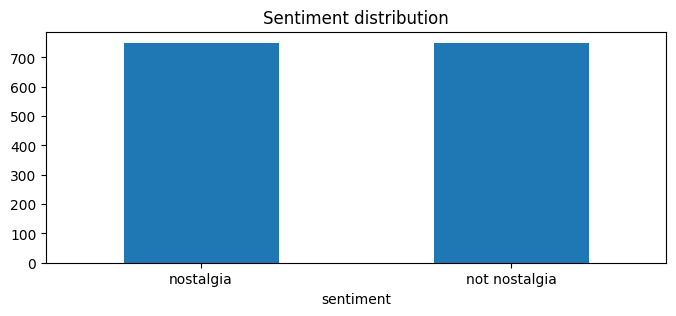

In [17]:
print(ytc.sentiment.value_counts())

ytc.sentiment.value_counts().plot(kind = "bar", title = "Sentiment distribution", rot = 0, figsize = (8,3)) # comments amount comparsion

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
import seaborn as sns

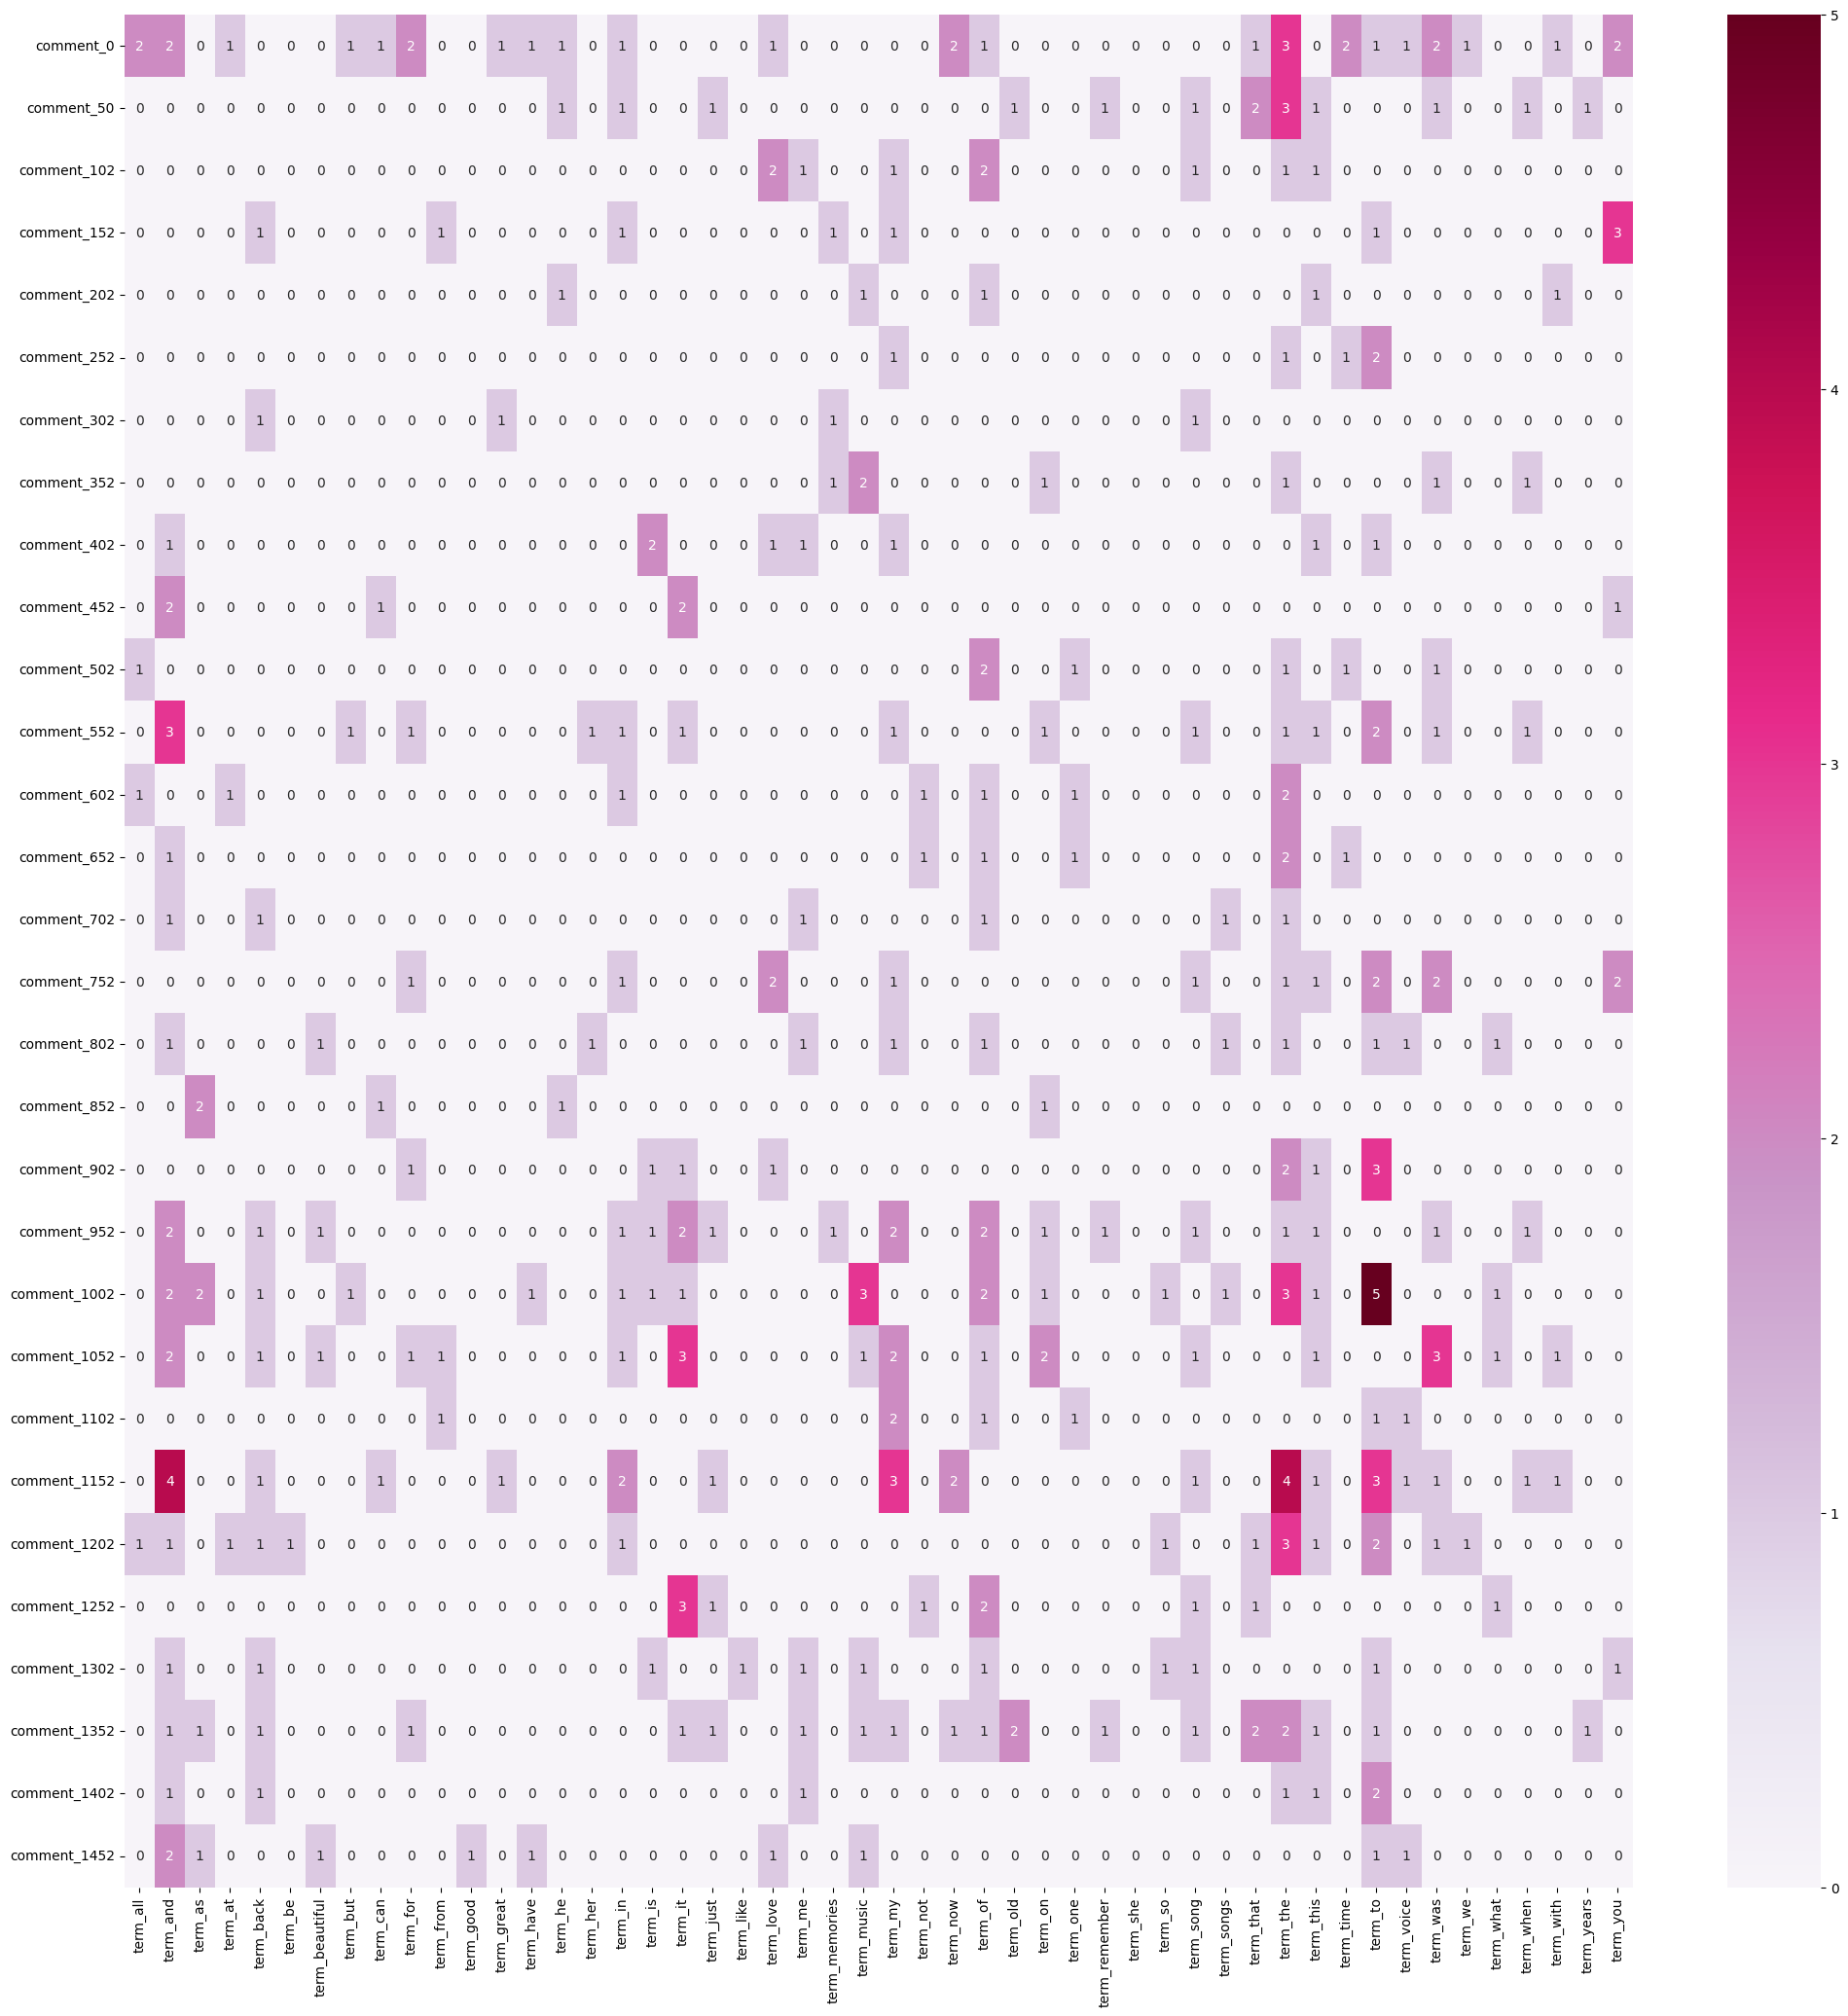

In [22]:
count_vect = CountVectorizer(max_features=50)
ytc_count = count_vect.fit_transform(ytc.comment)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:50]]
plot_y = ["comment_"+ str(i) for i in list(ytc.index)[:1498:50]]
plot_z = ytc_count[:1498:50,:50].toarray()

todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25,25))
ax = sns.heatmap(todraw,cmap="PuRd",vmin=0, vmax=5, annot=True) # Heat map of frequency in all comments

In [23]:
count_vect = CountVectorizer()
ytc_count = count_vect.fit_transform(ytc['comment'])

In [24]:
term_frequencies = []
for j in range(0,ytc_count.shape[1]):
    term_frequencies.append(sum(ytc_count[:,j].toarray()))

In [25]:
term_frequencies = np.asarray(ytc_count.sum(axis=0))[0]

In [26]:
import plotly.express as px

In [27]:
df = pd.DataFrame({
    'term': count_vect.get_feature_names_out(),
    'frequency': term_frequencies
})

Hfreq_terms = df.nlargest(50,"frequency")

fig = px.bar(Hfreq_terms, x='term', y='frequency',title=f"Top 50 Term Frequencies")
fig.update_xaxes(tickangle=90)
fig.show()   # frequency (in all comments)

In [28]:
ytc_count.shape

(1498, 3730)

In [29]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [30]:
df = pd.DataFrame({
    'term': count_vect.get_feature_names_out(),
    'frequency': term_frequencies_log
})

Hfreq_terms = df.nlargest(50,"frequency")

fig = px.bar(Hfreq_terms, x='term', y='frequency',title=f"Top 50 Term Frequencies")
fig.update_xaxes(tickangle=90)
fig.show()   # frequency (in all comments)

In [31]:
ytc_nos = ytc[ytc["sentiment_num"]==1]
len(ytc_nos)

750

In [32]:
ytc_nnos = ytc[ytc["sentiment_num"]==0]
len(ytc_nnos)

748

In [33]:
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['comment'])
    words = count_vect.get_feature_names_out()

    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df
nos_freq_df = create_term_document_df(ytc_nos)
nnos_freq_df = create_term_document_df(ytc_nnos)

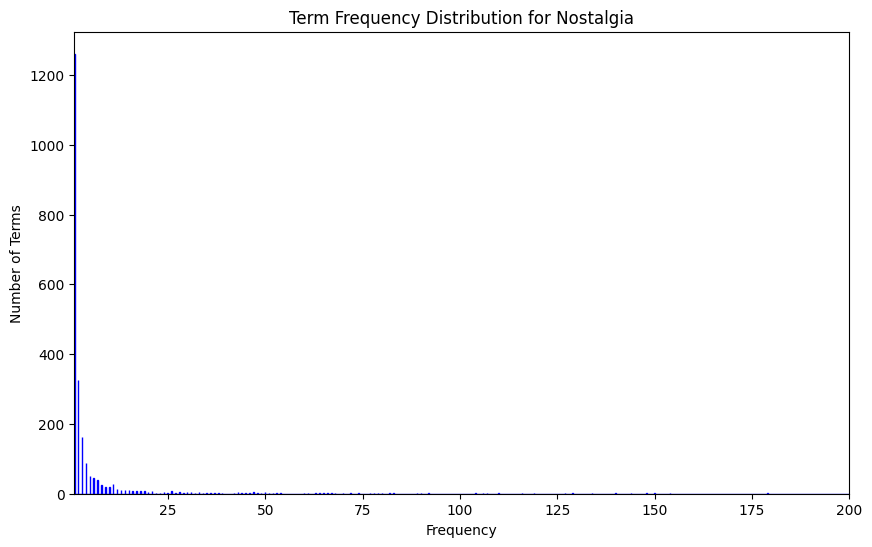

In [34]:
word_counts = nos_freq_df.sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='blue')
plt.title(f'Term Frequency Distribution for Nostalgia')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

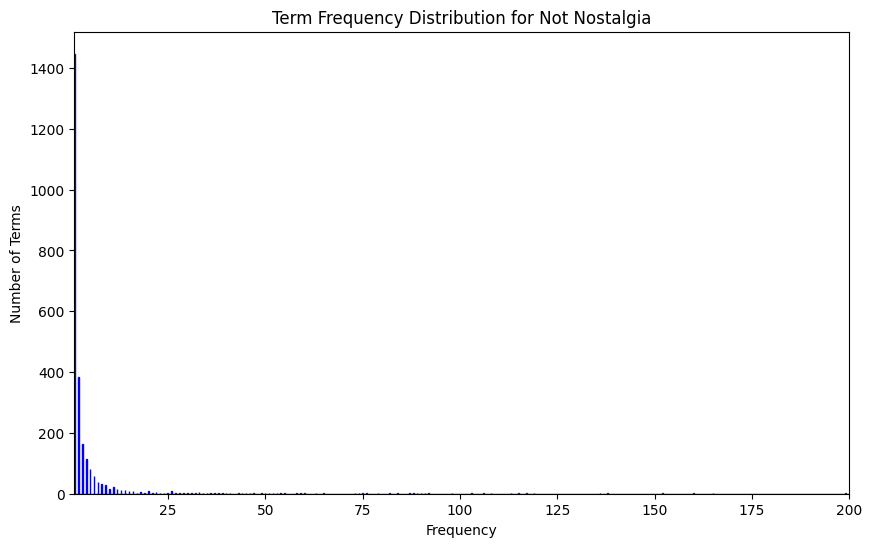

In [35]:
word_counts = nnos_freq_df.sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='blue')
plt.title(f'Term Frequency Distribution for Not Nostalgia')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [36]:
# Top 5% of frequency in Nostalgia
word_counts = nos_freq_df.sum(axis=0).to_numpy()
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

top_5_percent_indices = sorted_indices[:top_5_percent_index]

filtered_words = [nos_freq_df.iloc[:, i].name for i in top_5_percent_indices]

print("Category: Nostalgia")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'but', 'now', 'days', 'at', 'miss', 'good', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'he', 'just', 'always', 'have', 'she', 'first', 'dad', 'many', 'had', 'much', 'listening', 'his', 'like', 'loved', 'up', 'used', 'school', 'were', 'very', 'am', 'one', 'those', 'voice', 'every', 'be', 'him', 'never', 'heard', 'times', 'these', 'can', 'listen', 'not', 'young', 'what', 'are', 'best', 'they', 'played', 'hear', 'thank', 'sing', 'out', 'how', 'life', 'happy', 'thanks', 'then', 'radio', 'again', 'ago', 'really', 'mum', 'who', 'an', 'day', 'play', 'mom', 'there', 'some', 'our', 'after', 'came', 'passed', 'makes', 'wonderful', 'singing', 'little', 'takes']


In [37]:
# Top 5% of frequency in Not Nostalgia
word_counts = nnos_freq_df.sum(axis=0).to_numpy()
sorted_indices = np.argsort(word_counts)[::-1]
sorted_counts = np.sort(word_counts)[::-1]

total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

top_5_percent_indices = sorted_indices[:top_5_percent_index]

filtered_words = [nnos_freq_df.iloc[:, i].name for i in top_5_percent_indices]

print("Category: Nostalgia")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'not', 'be', 'what', 'can', 'me', 'voice', 'just', 'as', 'songs', 'beautiful', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'much', 'about', 'never', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'singer', 'an', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'man', 'video', 'some', 'heard', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those', 'di

In [38]:
# Bottom 1% of frequency in Nostalgia
word_counts = nos_freq_df.sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)
sorted_counts = word_counts[sorted_indices]

total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

filtered_words = [nos_freq_df.iloc[:, i].name for i in bottom_1_percent_indices]

print("Category: Nostalgia")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['yup', 'gospel', 'rose', 'round', 'rousing', 'goodness', 'routine', 'row', 'ronnie', 'rpg', 'ruined', 'rules', 'running', 'sadder', 'saddest', 'glimpses', 'safer', 'rubbish', 'grabbed', 'grace', 'romanticism', 'rightly']


In [39]:
# Bottom 1% of frequency in Not Nostalgia
word_counts = nnos_freq_df.sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)
sorted_counts = word_counts[sorted_indices]

total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

filtered_words = [nnos_freq_df.iloc[:, i].name for i in bottom_1_percent_indices]

print("Category: Nostalgia")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [40]:
!pip install PAMI==2024.4.17.1
import PAMI
dir(PAMI)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.8/962.8 kB 23.7 MB/s eta 0:00:00
  Attempting uninstall: PAMI
    Found existing installation: pami 2024.10.24.2
    Uninstalling pami-2024.10.24.2:
      Successfully uninstalled pami-2024.10.24.2


['__author__',
 '__builtins__',
 '__cached__',
 '__credits__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__']

In [41]:
from PAMI.extras.DF2DB import DenseFormatDF as db

obj_nos = db.DenseFormatDF(nos_freq_df)
obj_nnos = db.DenseFormatDF(nnos_freq_df)

obj_nos.convert2TransactionalDatabase('td_freq_db_nos.csv', '>=', 1)
obj_nnos.convert2TransactionalDatabase('td_freq_db_nnos.csv', '>=', 1)

Database size (total no of transactions) : 750
Number of items : 2295
Minimum Transaction Size : 3
Average Transaction Size : 21.644
Maximum Transaction Size : 70
Standard Deviation Transaction Size : 13.110095245013795
Variance in Transaction Sizes : 172.1040694259012
Sparsity : 0.9905690631808279


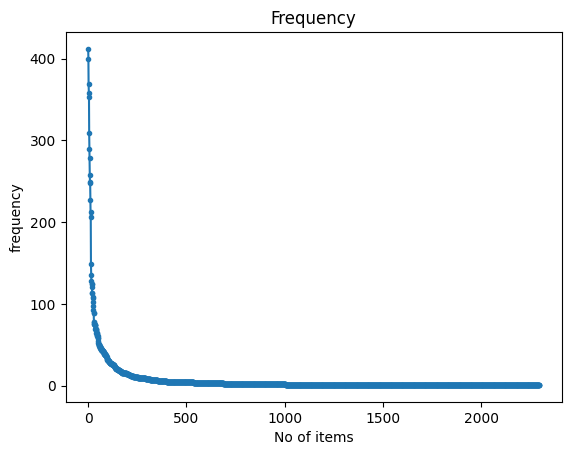

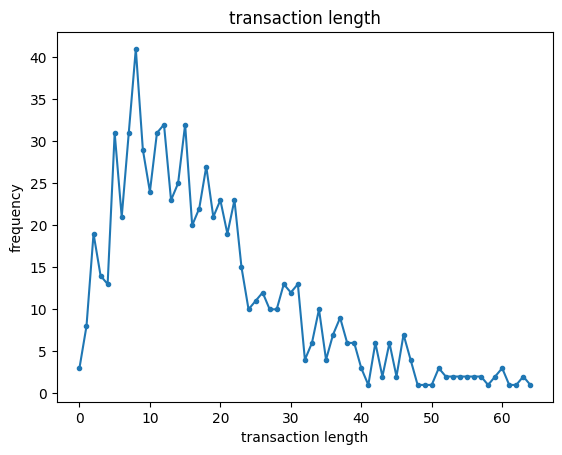

In [42]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nos.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 748
Number of items : 2602
Minimum Transaction Size : 4
Average Transaction Size : 20.060160427807485
Maximum Transaction Size : 71
Standard Deviation Transaction Size : 10.370044579132406
Variance in Transaction Sizes : 107.68178417770905
Sparsity : 0.9922904840784752


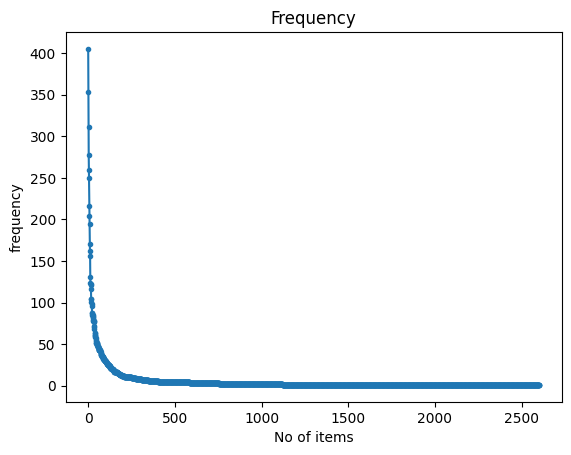

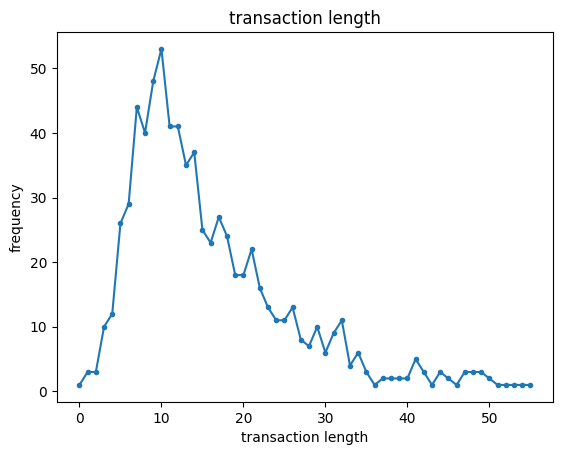

In [43]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nnos.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [44]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=15
obj1 = alg.FPGrowth(iFile='td_freq_db_nos.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nos= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nos))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 18277
Runtime: 2.6013717651367188


In [45]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_nnos.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nnos= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nnos))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9697
Runtime: 0.34281253814697266


In [46]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nos, frequentPatternsDF_nnos]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                      Patterns  Support
14454                memories       227
16042                   to my       227
16037                 song my       212
16046                the this       212
16044                  the my       192
...                        ...      ...
21085      but my in this and         9
21086  but my in this and the         9
17120         there that this         9
18546              are you of         9
19682            what love it         9

[23514 rows x 2 columns]
Number of patterns discarded: 4460


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
ytc_tdm = count_vect.fit_transform(ytc['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
ytc['tokenized_text'] = ytc['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=ytc.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = ytc['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(ytc_tdm.toarray(), columns=terms, index=ytc.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,but song and of this the,there but to,but my it,are you to the,but my of the,but my in this and,but my in this and the,there that this,are you of,what love it
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
import PAMI.frequentPattern.topk.FAE as fae
from PAMI.frequentPattern.maximal import MaxFPGrowth as mfpg
import time

In [49]:
nos_path = "td_freq_db_nos.csv"
nnos_path = "td_freq_db_nnos.csv"

k_values = [500,1000]
min_sup = ["3","6","9"]


for K in k_values:
    obj_nos = fae.FAE(nos_path, K)
    obj_nos.mine()
    topKFrequentPatterns = obj_nos.getPatterns()
    print("K = ",K)
    print("Total number of Frequent Patterns:", len(topKFrequentPatterns))

    obj_nos.save(f"fae_nos_{K}")#{categories[category_number]}

    memUSS = obj_nos.getMemoryUSS()
    print("Total Memory in USS:", memUSS)

    memRSS = obj_nos.getMemoryRSS()
    print("Total Memory in RSS", memRSS)

    run = obj_nos.getRuntime()
    print("Total ExecutionTime in seconds:", run)



for m in min_sup:
    obj_nos = mfpg.MaxFPGrowth(nos_path, m)

    obj_nos.mine()

    frequentPatterns = obj_nos.getPatterns()

    print("Total number of Frequent Patterns:", len(frequentPatterns))

    obj_nos.save("patterns")

    memUSS = obj_nos.getMemoryUSS()

    print("Total Memory in USS:", memUSS)

    memRSS = obj_nos.getMemoryRSS()

    print("Total Memory in RSS", memRSS)

    run = obj_nos.getRuntime()

    print("Total ExecutionTime in seconds:", run)

 TopK frequent patterns were successfully generated using FAE algorithm.
K =  500
Total number of Frequent Patterns: 500
Total Memory in USS: 1759723520
Total Memory in RSS 1815736320
Total ExecutionTime in seconds: 1.3556430339813232
 TopK frequent patterns were successfully generated using FAE algorithm.
K =  1000
Total number of Frequent Patterns: 1000
Total Memory in USS: 1759723520
Total Memory in RSS 1815736320
Total ExecutionTime in seconds: 8.51967167854309
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 47915
Total Memory in USS: 1775550464
Total Memory in RSS 1831673856
Total ExecutionTime in seconds: 112.55837345123291
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 28197
Total Memory in USS: 1787555840
Total Memory in RSS 1843568640
Total ExecutionTime in seconds: 19.563472270965576
Maximal Frequent patterns were generated successfull

In [50]:
for K in k_values:
    obj_nnos = fae.FAE(nnos_path, K)
    obj_nnos.mine()
    topKFrequentPatterns = obj_nnos.getPatterns()
    print("K = ",K)
    print("Total number of Frequent Patterns:", len(topKFrequentPatterns))

    obj_nos.save(f"fae_nnos_{K}")#{categories[category_number]}

    memUSS = obj_nnos.getMemoryUSS()
    print("Total Memory in USS:", memUSS)

    memRSS = obj_nnos.getMemoryRSS()
    print("Total Memory in RSS", memRSS)

    run = obj_nnos.getRuntime()
    print("Total ExecutionTime in seconds:", run)



for m in min_sup:
    obj_nnos = mfpg.MaxFPGrowth(nnos_path, m)

    obj_nnos.mine()

    frequentPatterns = obj_nnos.getPatterns()

    print("Total number of Frequent Patterns:", len(frequentPatterns))

    obj_nnos.save("patterns")

    memUSS = obj_nnos.getMemoryUSS()

    print("Total Memory in USS:", memUSS)

    memRSS = obj_nnos.getMemoryRSS()

    print("Total Memory in RSS", memRSS)

    run = obj_nnos.getRuntime()

    print("Total ExecutionTime in seconds:", run)

 TopK frequent patterns were successfully generated using FAE algorithm.
K =  500
Total number of Frequent Patterns: 500
Total Memory in USS: 1785479168
Total Memory in RSS 1841496064
Total ExecutionTime in seconds: 0.9286432266235352
 TopK frequent patterns were successfully generated using FAE algorithm.
K =  1000
Total number of Frequent Patterns: 1000
Total Memory in USS: 1785495552
Total Memory in RSS 1841496064
Total ExecutionTime in seconds: 4.9598915576934814
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 25094
Total Memory in USS: 1785499648
Total Memory in RSS 1841496064
Total ExecutionTime in seconds: 12.054611682891846
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 9108
Total Memory in USS: 1784451072
Total Memory in RSS 1840685056
Total ExecutionTime in seconds: 1.8268742561340332
Maximal Frequent patterns were generated successful

In [51]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
ytc_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
ytc_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
ytc_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

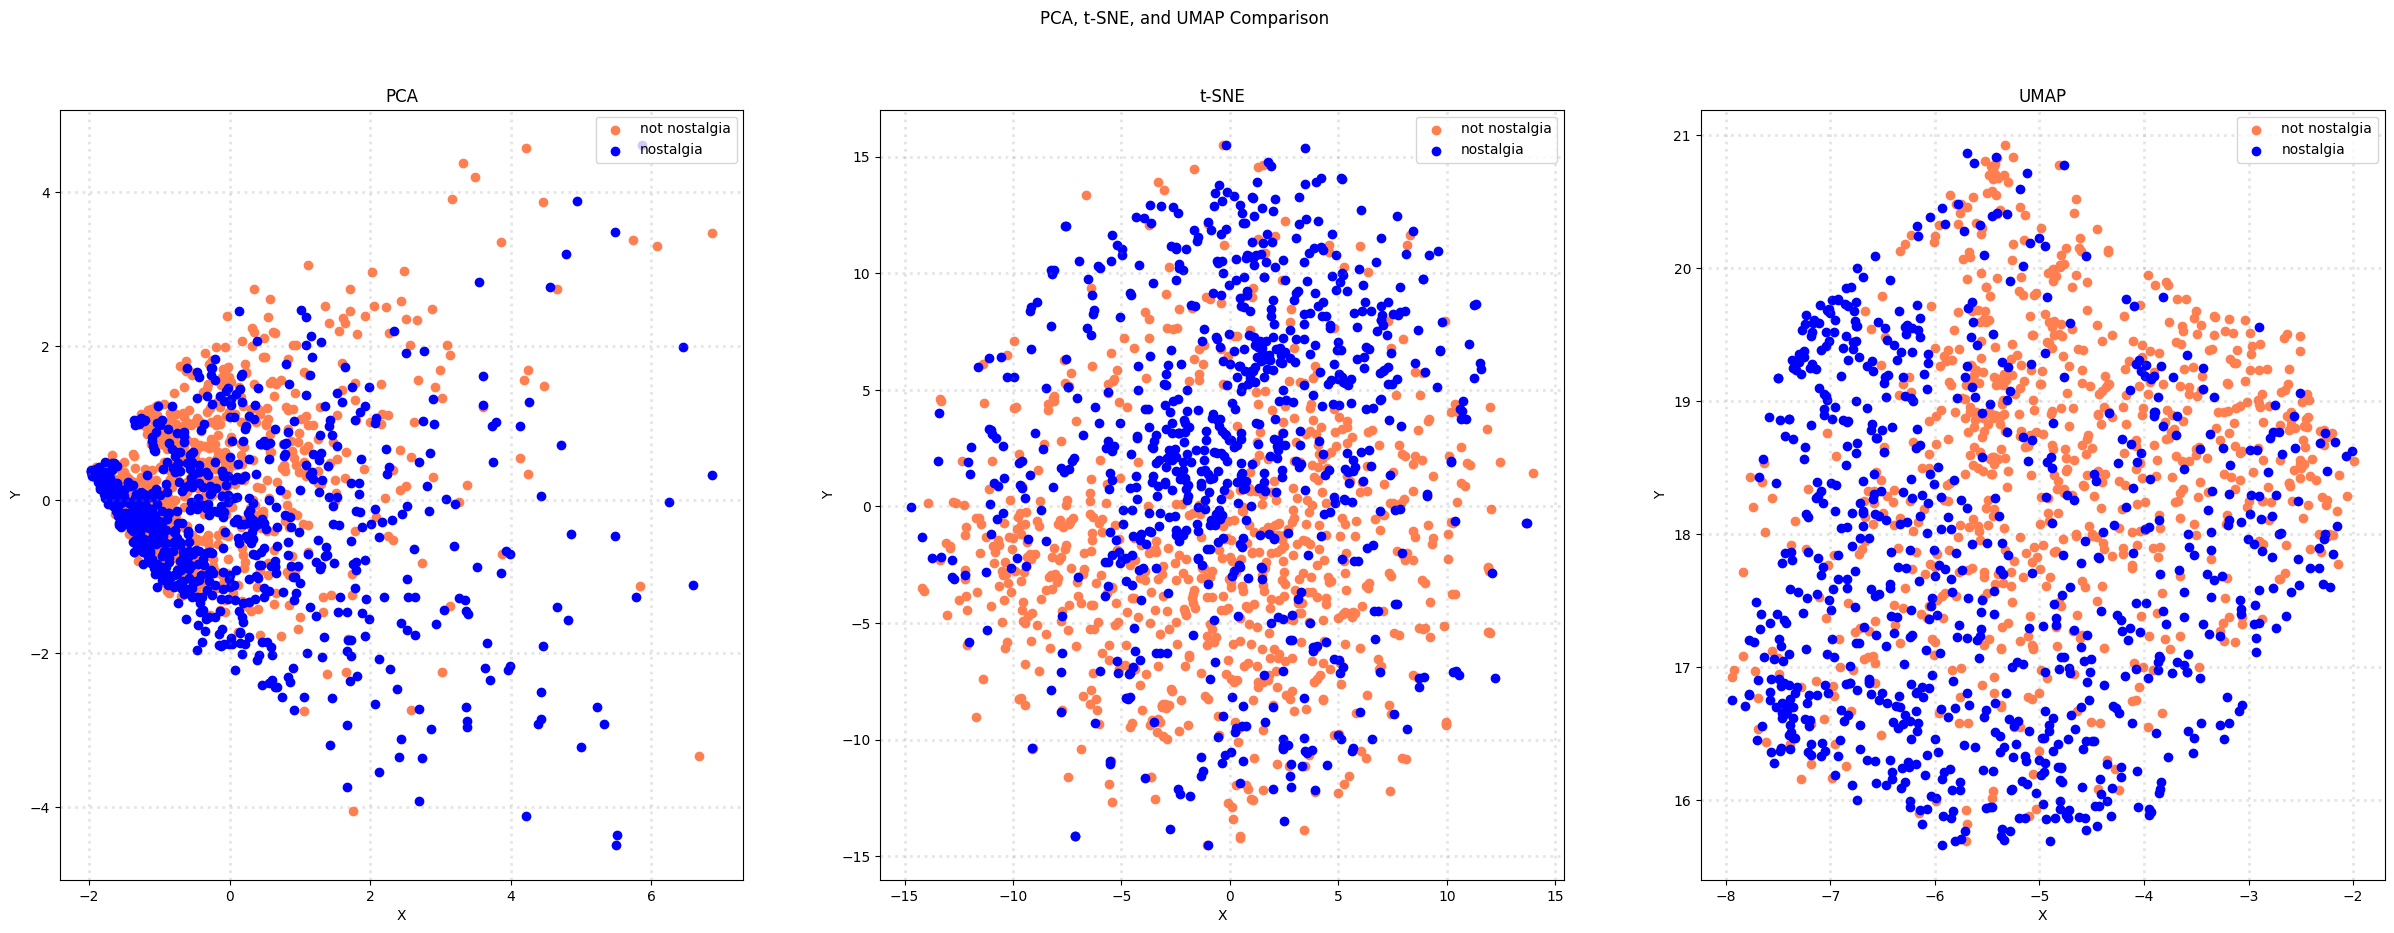

In [52]:
col = ['coral', 'blue', 'black', 'orange']
categories = ytc['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[ytc['sentiment'] == category].T[0]
        ys = X_reduced[ytc['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], ytc_pca_tdm, 'PCA')
plot_scatter(axes[1], ytc_tsne_tdm, 't-SNE')
plot_scatter(axes[2], ytc_umap_tdm, 'UMAP')

plt.show()

In [53]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

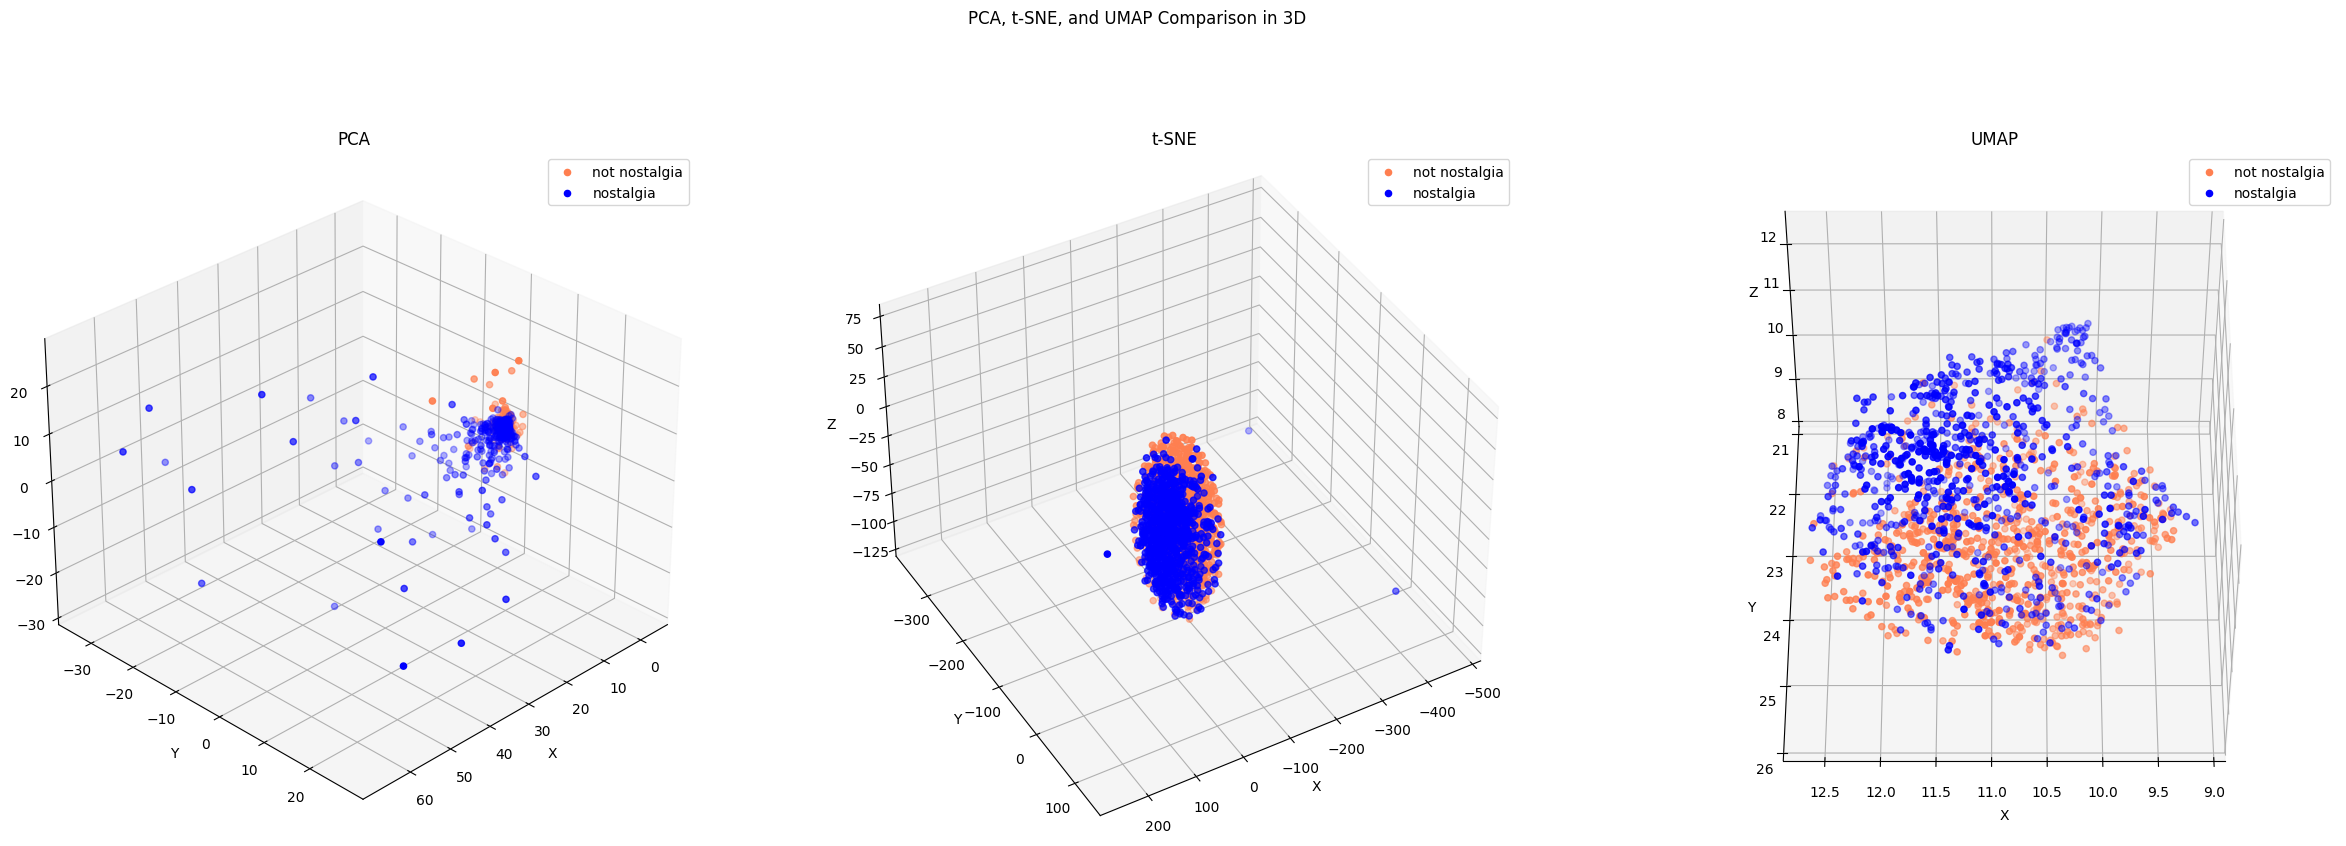

In [54]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']
categories = ytc['sentiment'].unique()

fig = plt.figure(figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison in 3D')

# Define a function to create a 3D scatter plot for each method
def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[ytc['sentiment'] == category].T[0]
        ys = X_reduced[ytc['sentiment'] == category].T[1]
        zs = X_reduced[ytc['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_aug, 'PCA')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_aug, 't-SNE')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_aug, 'UMAP')


ax1.view_init(elev=30, azim=45)  # PCA with angle 1
ax2.view_init(elev=40, azim=60)  # t-SNE with angle 2
ax3.view_init(elev=50, azim=90)  # UMAP with angle 3

plt.show()

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(ytc[['sentiment_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, ytc['sentiment_num'], test_size=0.3, random_state=42)

In [56]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9463    0.8220    0.8798       236
    nostalgia     0.8286    0.9486    0.8845       214

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [57]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(ytc[['sentiment_num', 'sentiment']].drop_duplicates().values)

target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train, X_test, y_train, y_test = train_test_split(augmented_df, ytc['sentiment_num'], test_size=0.3, random_state=42)

In [58]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8377777777777777

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.7860    0.9492    0.8599       236
    nostalgia     0.9273    0.7150    0.8074       214

     accuracy                         0.8378       450
    macro avg     0.8566    0.8321    0.8336       450
 weighted avg     0.8532    0.8378    0.8349       450



**PART 3**

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
ytc_tfidf = vectorizer.fit_transform(ytc.comment)

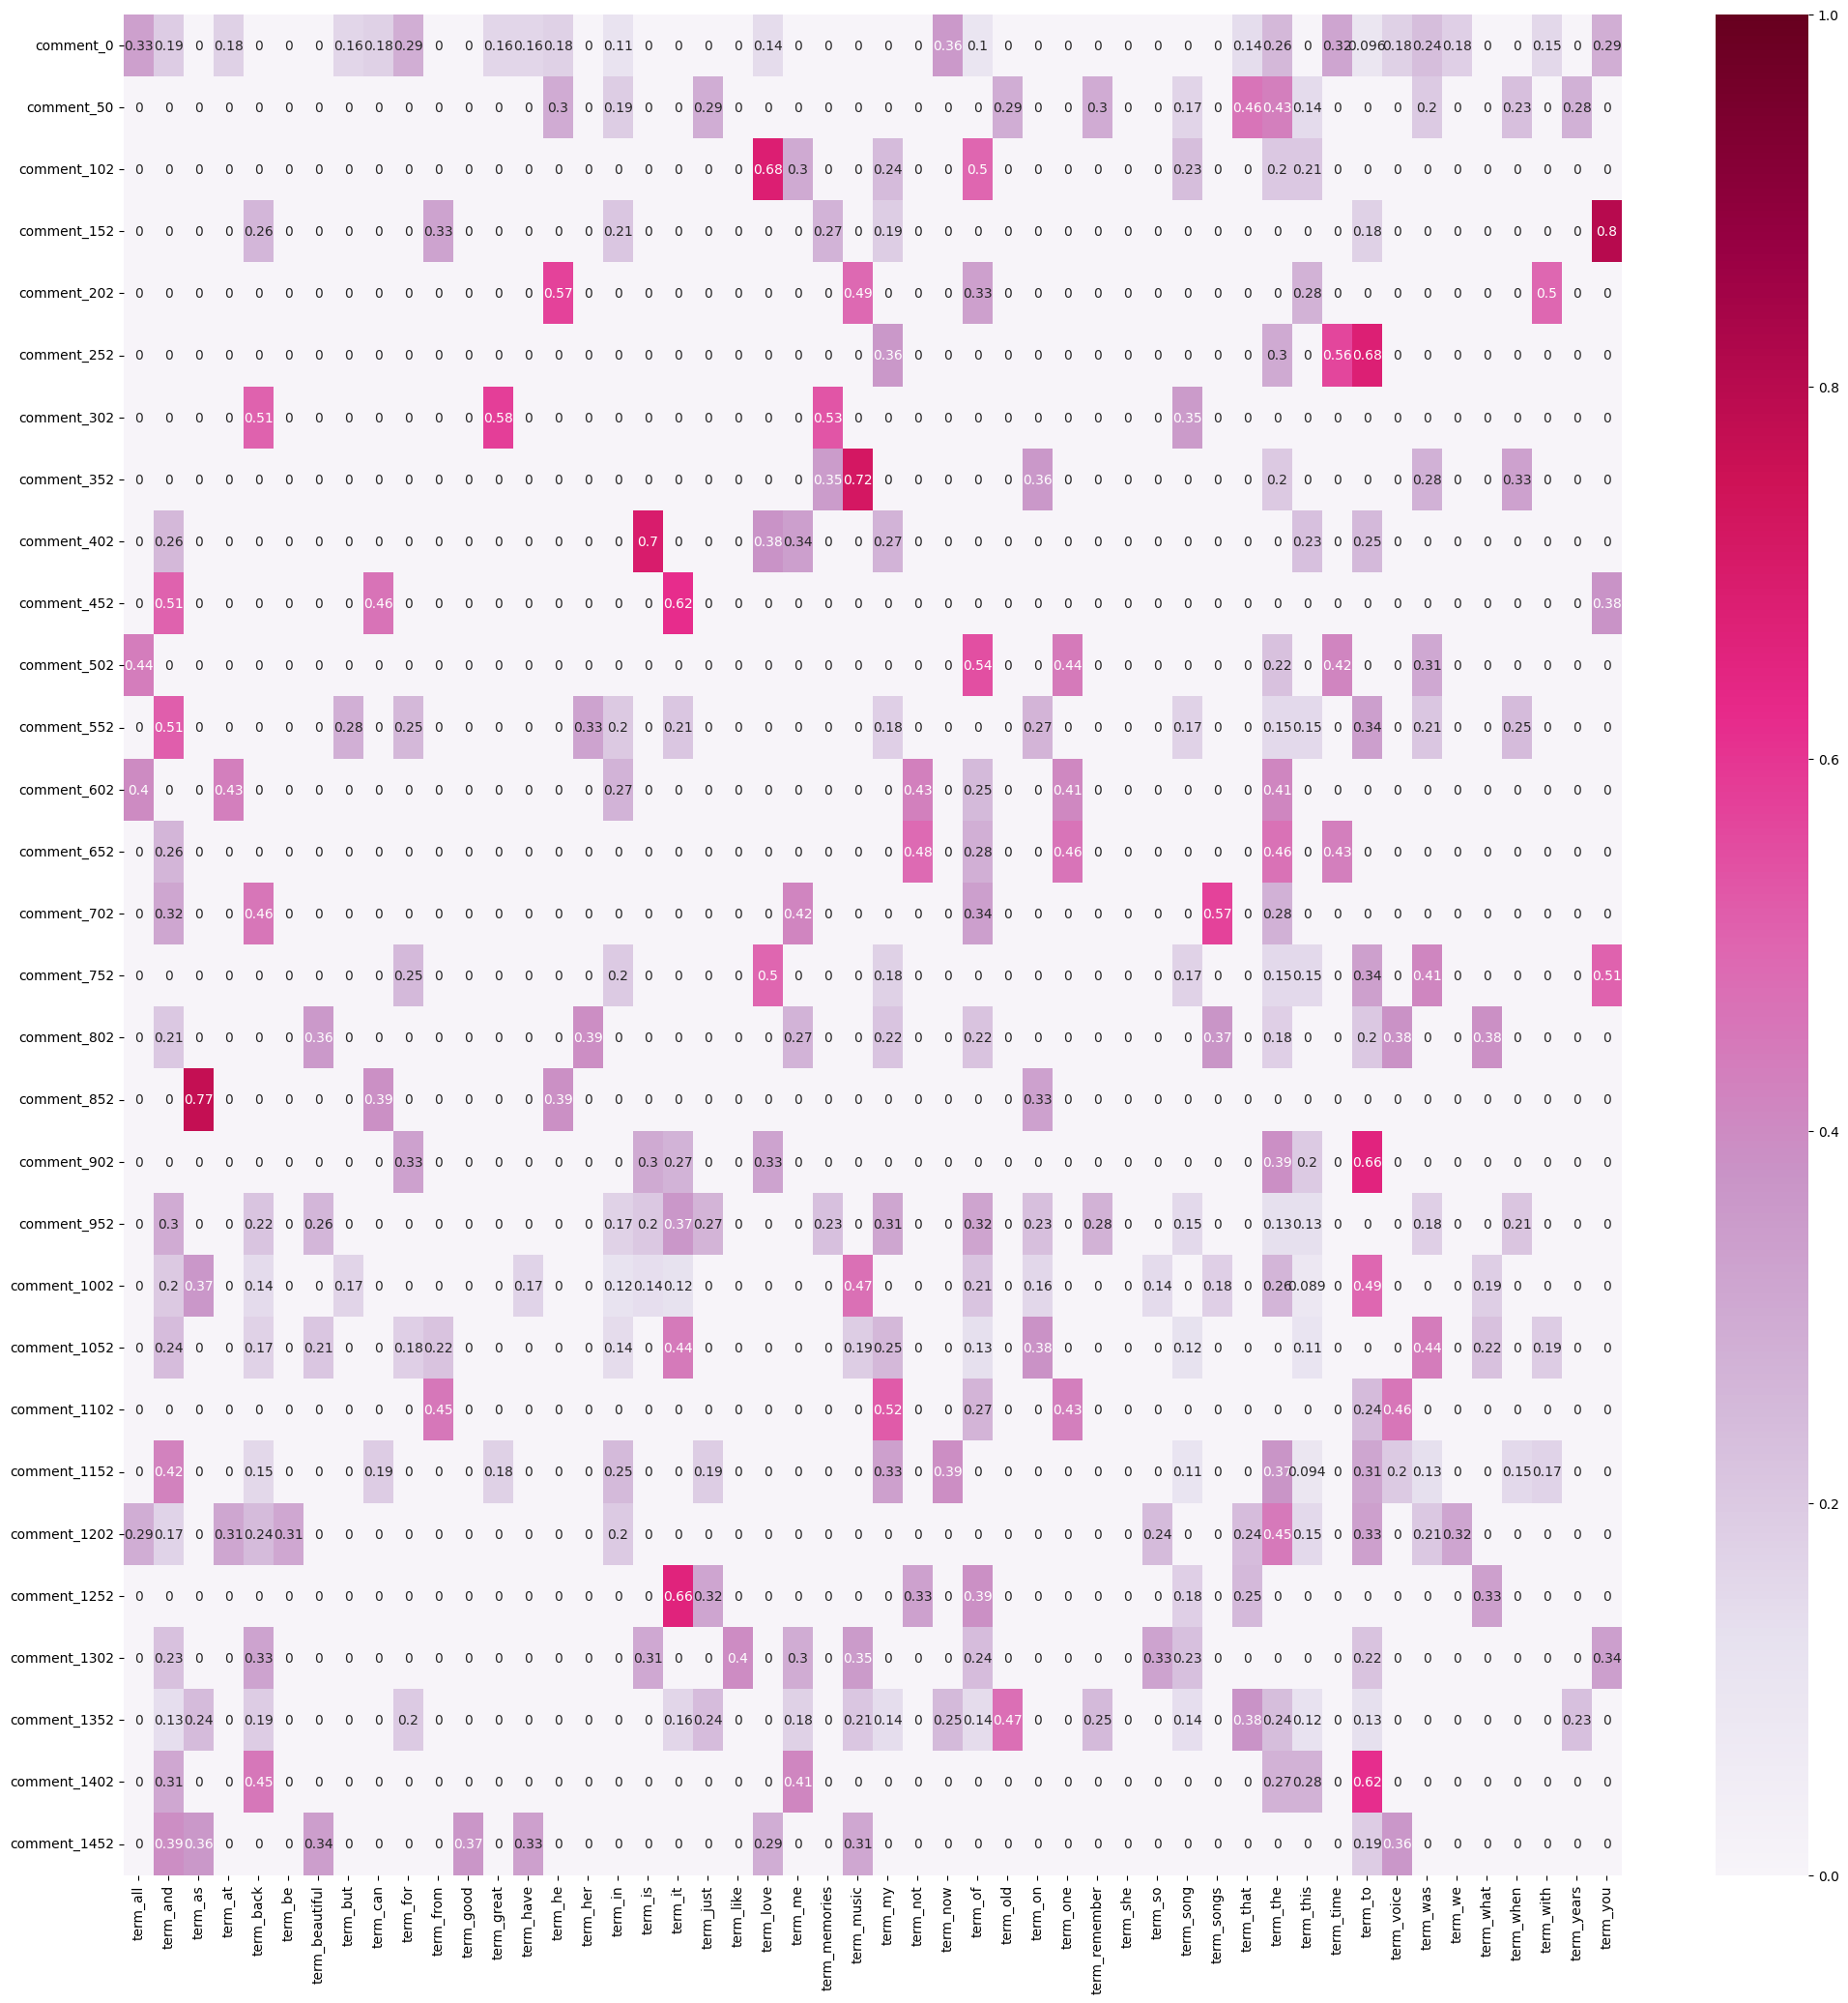

In [60]:
vectorizer = TfidfVectorizer(max_features=50)
ytc_tfidf = vectorizer.fit_transform(ytc.comment)

plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[:50]]
plot_y = ["comment_"+ str(i) for i in list(ytc.index)[:1498:50]]
plot_z = ytc_tfidf[:1498:50,:50].toarray()

todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25,25))
ax = sns.heatmap(todraw,cmap="PuRd",vmin=0, vmax=1, annot=True) # heat map for TD-IDF of all comments

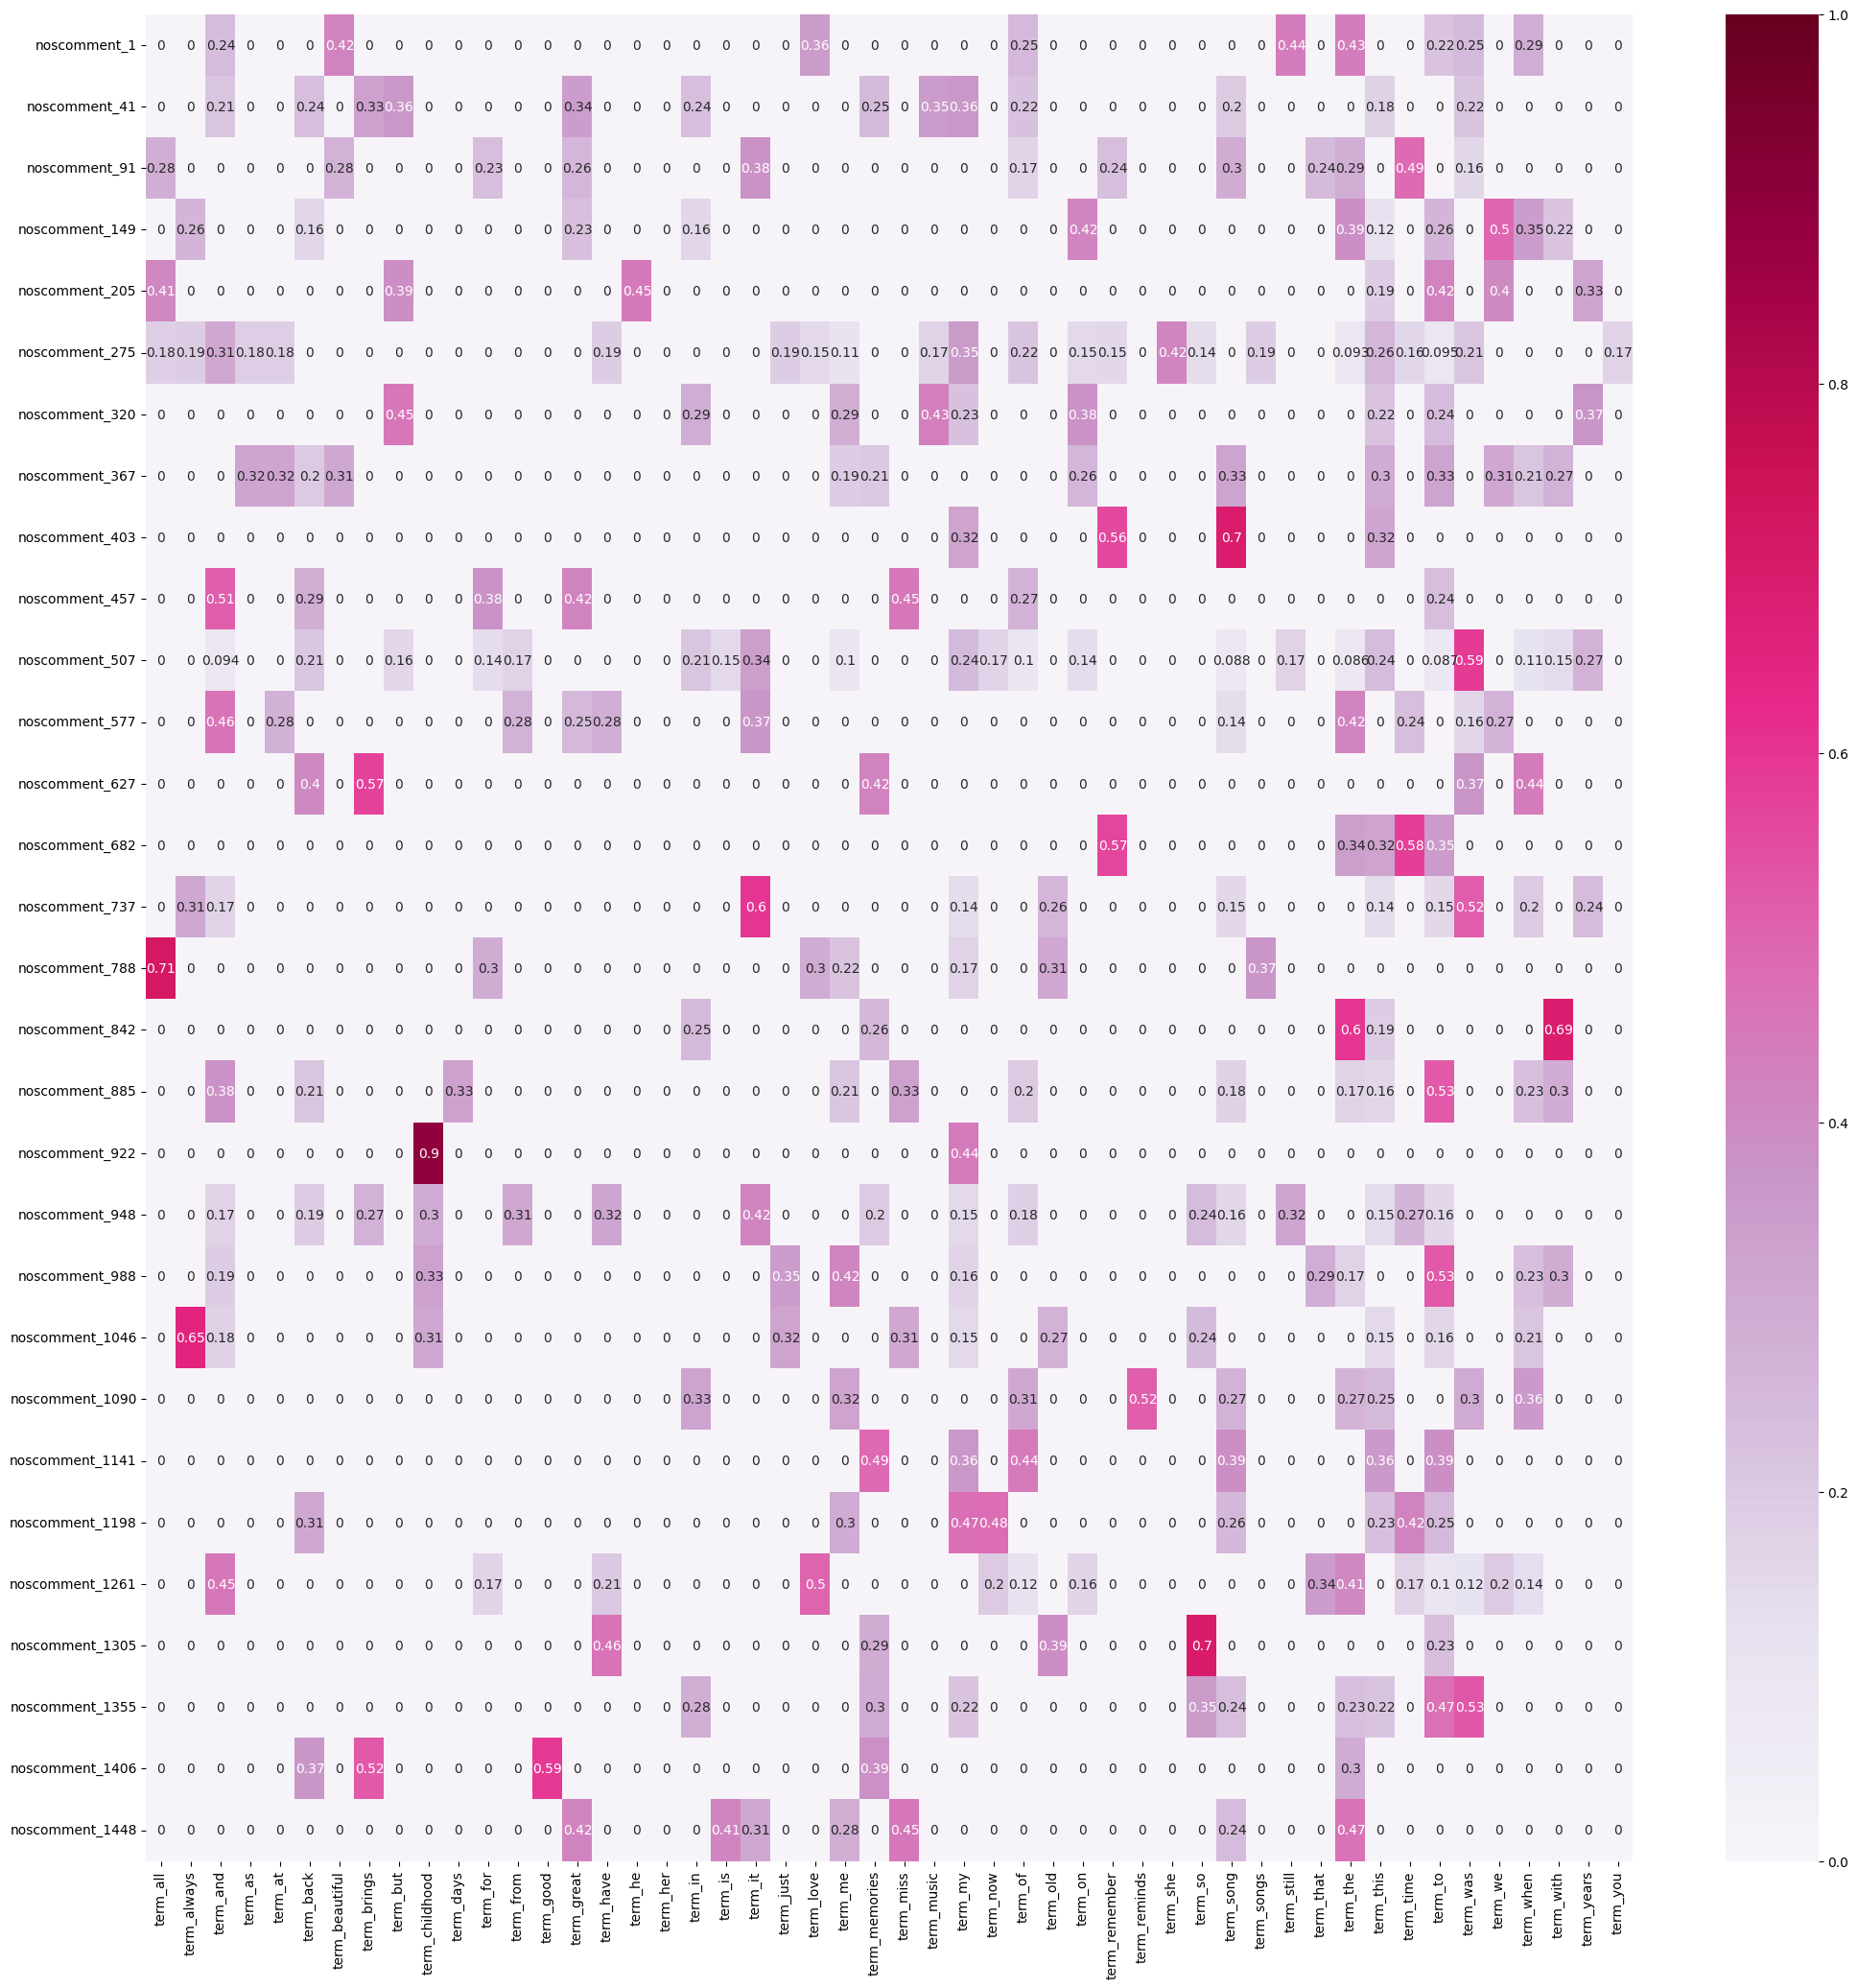

In [61]:
vectorizer = TfidfVectorizer(max_features=50)
nos_matrix = vectorizer.fit_transform(ytc_nos.comment)

plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[:50]]
plot_y = ["noscomment_"+ str(i) for i in list(ytc_nos.index)[:750:25]]
plot_z = nos_matrix[:750:25,:50].toarray()

nos_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25,25))
ax = sns.heatmap(nos_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)  # heat map for TD-IDF of the nostalgia comments


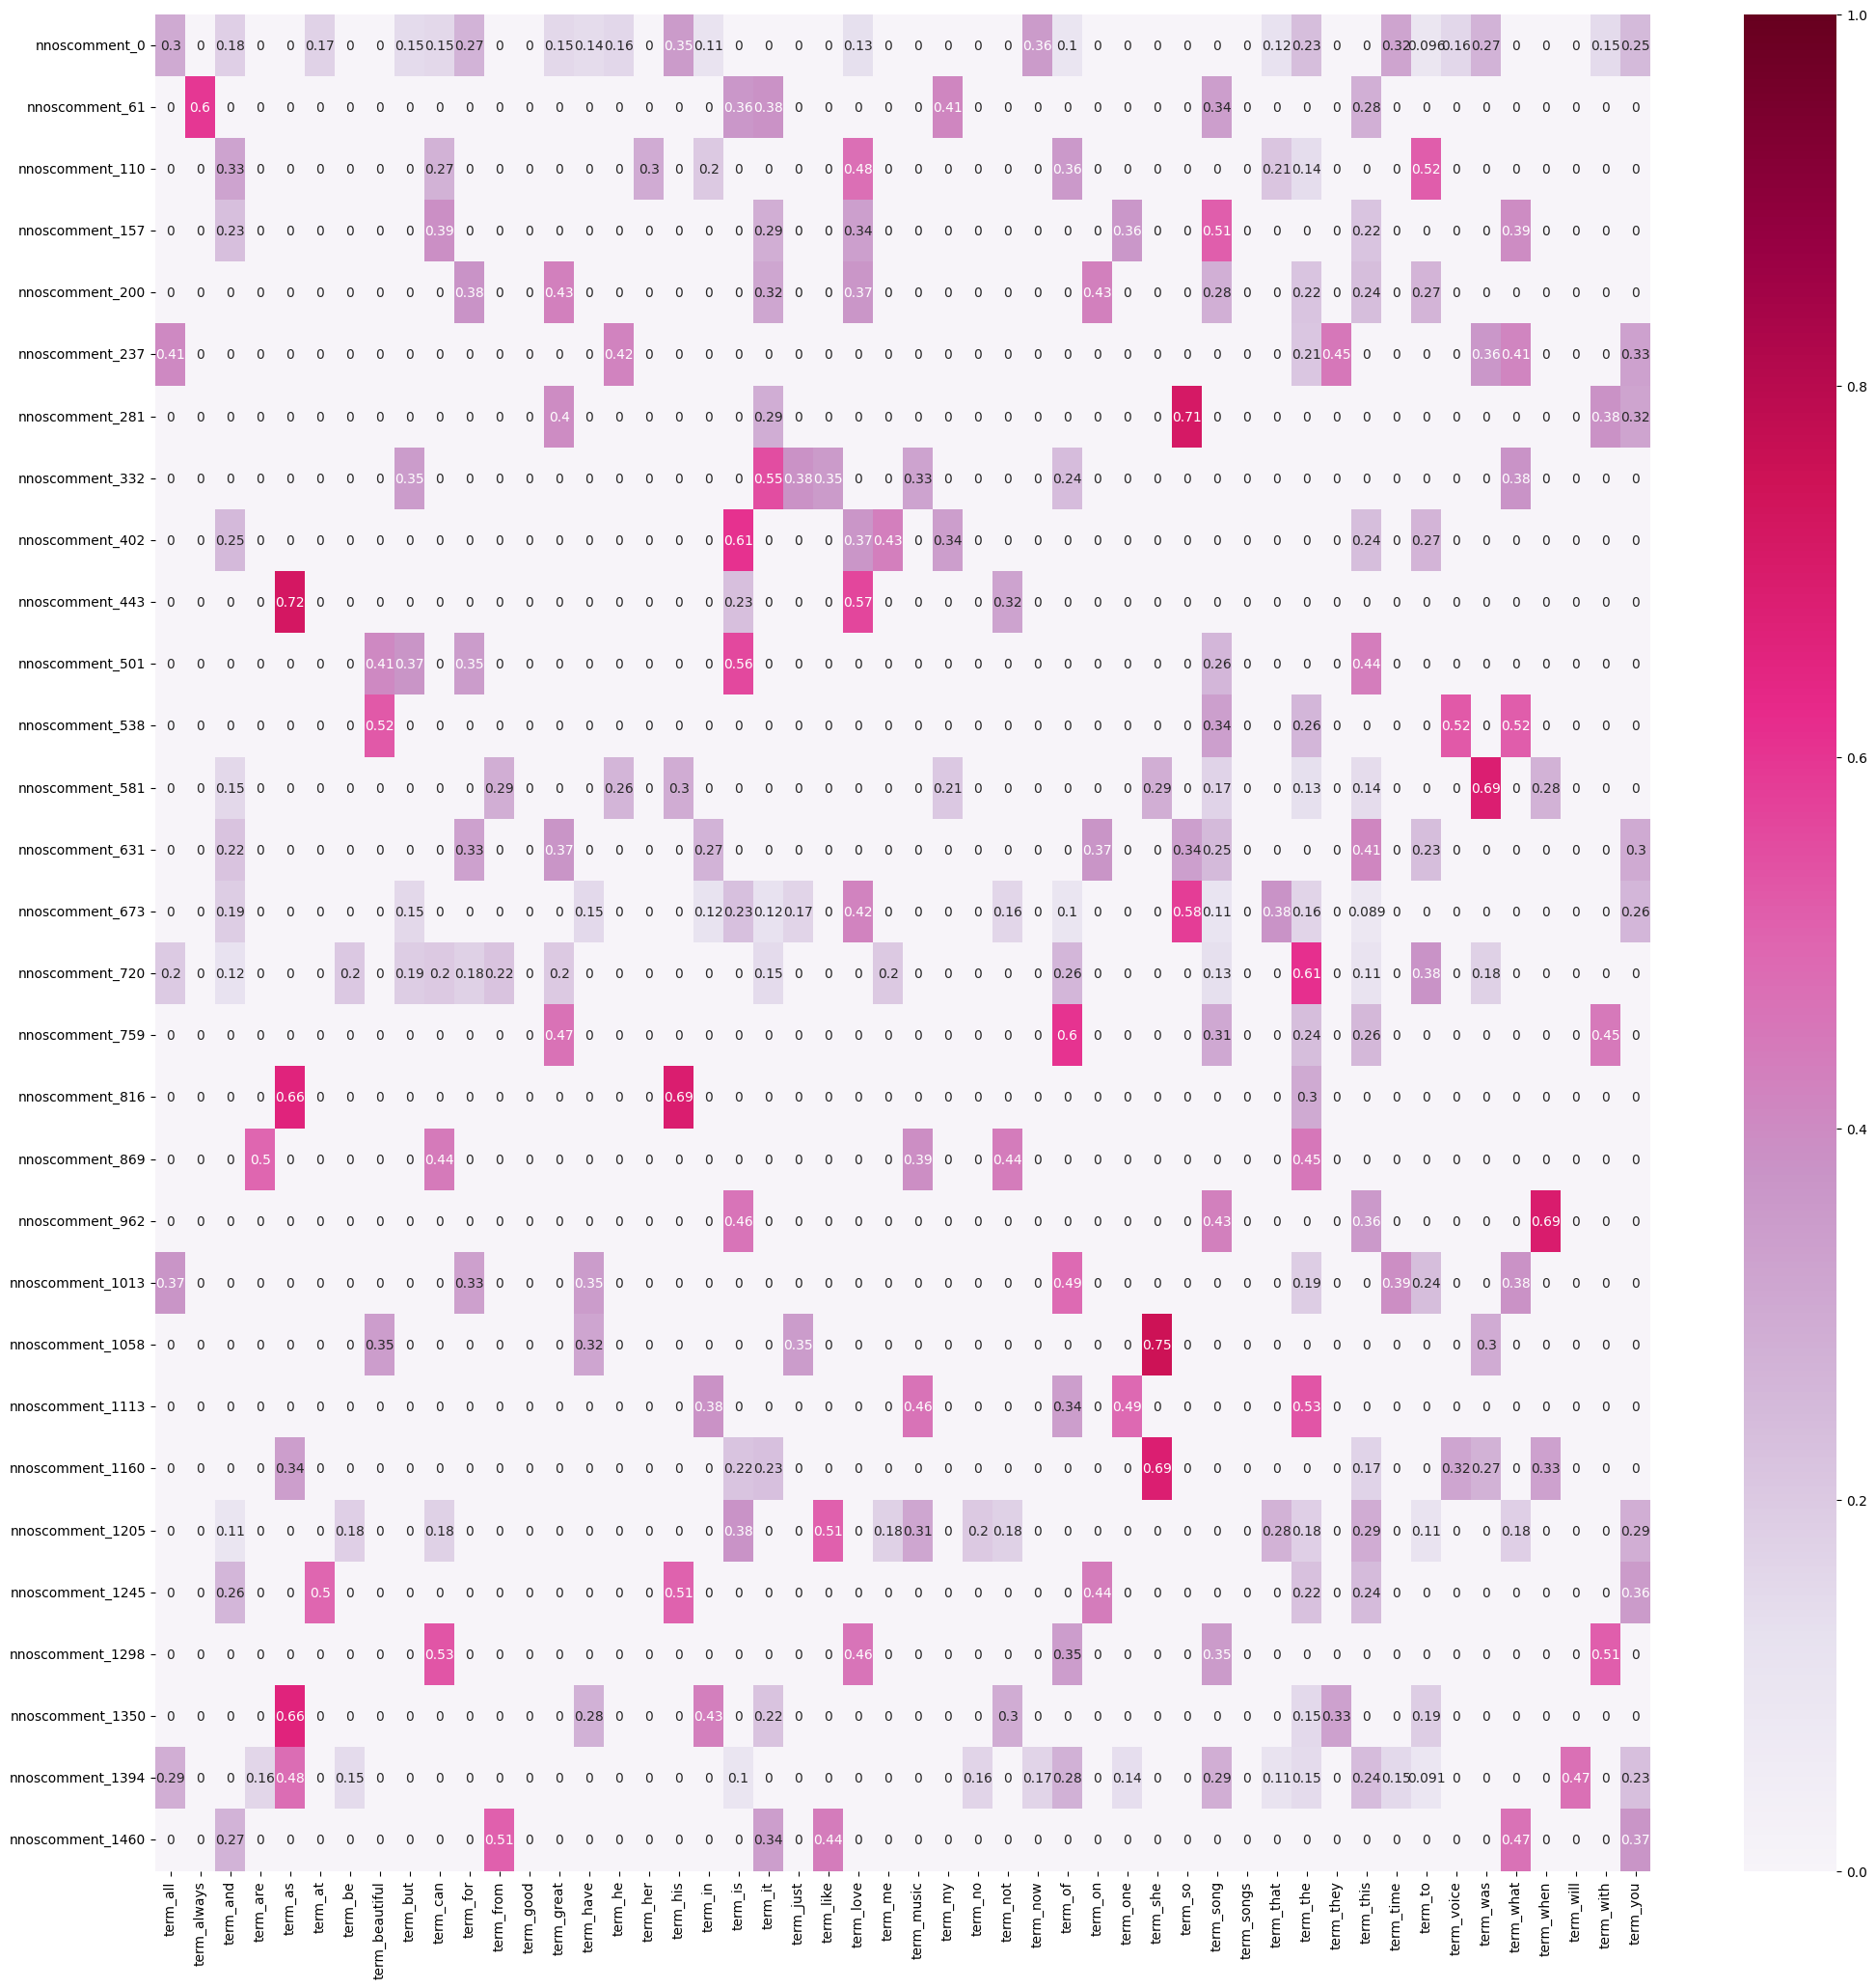

In [62]:
vectorizer = TfidfVectorizer(max_features=50)
nnos_matrix = vectorizer.fit_transform(ytc_nnos.comment)

plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[:50]]
plot_y = ["nnoscomment_"+ str(i) for i in list(ytc_nnos.index)[:748:25]]
plot_z = nnos_matrix[:748:25,:50].toarray()

nnos_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25,25))
ax = sns.heatmap(nnos_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)  # heat map for TD-IDF of the Not nostalgia comments

In [78]:
!pip install wordcloud matplotlib

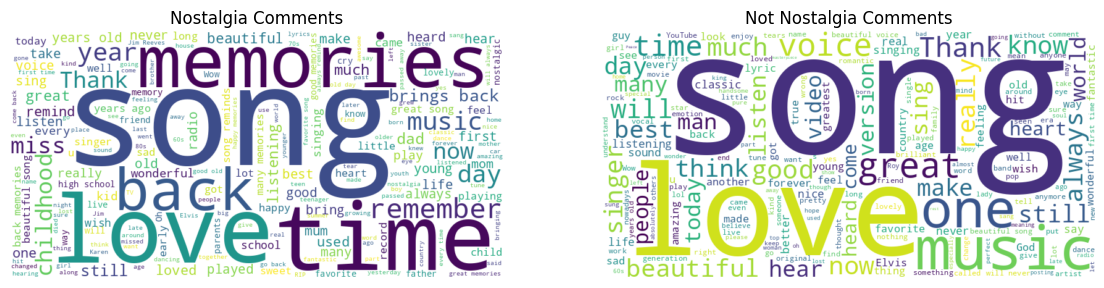

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nostalgia_text = " ".join(comment for comment in ytc_nos['comment'])
not_nostalgia_text = " ".join(comment for comment in ytc_nnos['comment'])

nostalgia_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nostalgia_text)
not_nostalgia_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(not_nostalgia_text)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(nostalgia_wordcloud, interpolation='bilinear')
plt.title("Nostalgia Comments")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(not_nostalgia_wordcloud, interpolation='bilinear')
plt.title("Not Nostalgia Comments")
plt.axis('off')

plt.show()  # Word cloud of both sentiment

In [82]:
ytc['comment_length'] = ytc['comment'].apply(len)


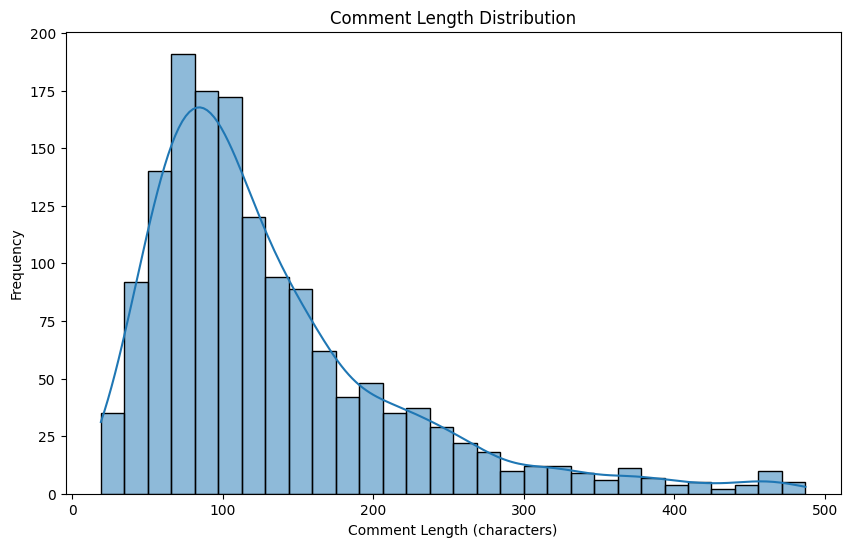

In [84]:
# Comments length of all comments
plt.figure(figsize=(10, 6))
sns.histplot(ytc['comment_length'], bins=30, kde=True)
plt.title("Comment Length Distribution")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Frequency")
plt.show()

In [89]:
ytc_nos_clen = ytc[ytc['sentiment']=='nostalgia']['comment_length']
ytc_nnos_clen = ytc[ytc['sentiment']=='not nostalgia']['comment_length']

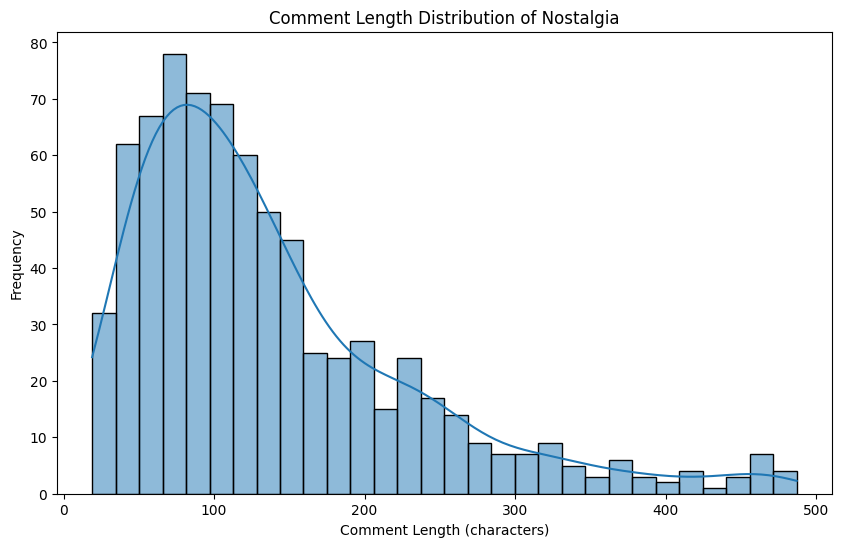

In [91]:
# Comments length of Nostalgia
plt.figure(figsize=(10, 6))
sns.histplot(ytc_nos_clen, bins=30, kde=True)
plt.title("Comment Length Distribution of Nostalgia")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Frequency")
plt.show()

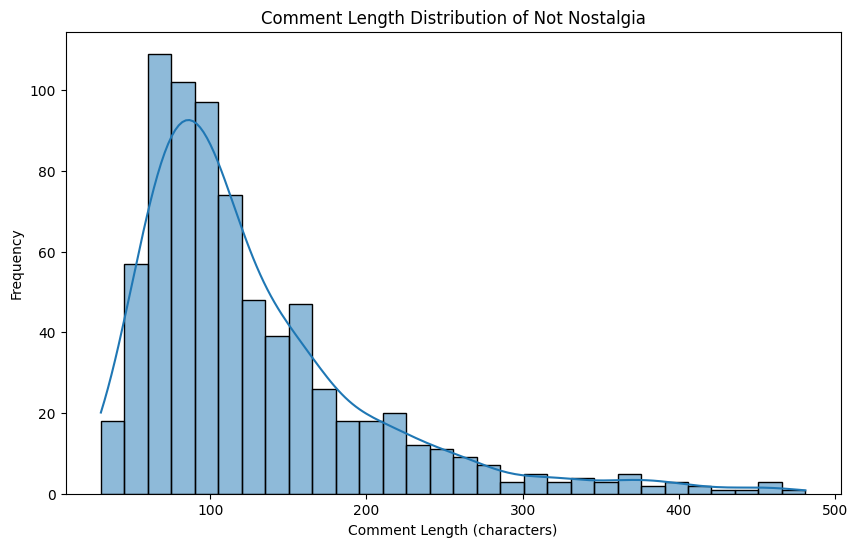

In [92]:
# Comments length of Not Nostalgia
plt.figure(figsize=(10, 6))
sns.histplot(ytc_nnos_clen, bins=30, kde=True)
plt.title("Comment Length Distribution of Not Nostalgia")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Frequency")
plt.show()

In [63]:
vectorizer = TfidfVectorizer()
ytc_tfidf = vectorizer.fit_transform(ytc.comment)
vectorizer.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

In [64]:
nosvectorizer = TfidfVectorizer()
nos_matrix = nosvectorizer.fit_transform(ytc_nos.comment)
nnosvectorizer = TfidfVectorizer()
nnos_matrix = nnosvectorizer.fit_transform(ytc_nnos.comment)

In [65]:
nos_df = pd.DataFrame(nos_matrix.toarray(),columns = nosvectorizer.get_feature_names_out())
nnos_df = pd.DataFrame(nnos_matrix.toarray(),columns = nnosvectorizer.get_feature_names_out())

In [66]:
# Top 5% of TF_IDF in Nostalgia
word_counts = nos_df.sum(axis=0).to_numpy()
sorted_indices = np.argsort(word_counts)[::-1]
sorted_counts = np.sort(word_counts)[::-1]

total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

top_5_percent_indices = sorted_indices[:top_5_percent_index]

filtered_words = [nos_df.iloc[:, i].name for i in top_5_percent_indices]

print("Category: Nostalgia")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'song', 'and', 'was', 'of', 'back', 'me', 'memories', 'it', 'in', 'when', 'so', 'love', 'brings', 'years', 'time', 'you', 'remember', 'childhood', 'for', 'that', 'old', 'beautiful', 'great', 'reminds', 'on', 'days', 'music', 'good', 'is', 'miss', 'with', 'all', 'many', 'dad', 'songs', 'always', 'from', 'we', 'as', 'but', 'now', 'listening', 'much', 'at', 'still', 'first', 'her', 'just', 'times', 'young', 'those', 'school', 'loved', 'he', 'very', 'thank', 'best', 'had', 'happy', 'she', 'used', 'his', 'have', 'up', 'these', 'listen', 'am', 'every', 'like', 'takes', 'were', 'what', 'voice', 'him', 'one', 'thanks', 'they', 'played', 'heard', 'hear', 'bring', 'can', 'sing', 'mom', 'never', 'be', 'how', 'life', 'again', 'ago', 'really', 'some', 'nostalgic', 'then', 'kid', 'are', 'wish', 'makes', 'play', 'not', 'mum', 'favorite', 'day', 'radio', 'go', 'out', 'wonderful', 'memory', 'little', 'singing

In [67]:
# Top 5% of TF_IDF in Not Nostalgia
ord_counts = nnos_df.sum(axis=0).to_numpy()
sorted_indices = np.argsort(word_counts)[::-1]
sorted_counts = np.sort(word_counts)[::-1]

total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

top_5_percent_indices = sorted_indices[:top_5_percent_index]

filtered_words = [nnos_df.iloc[:, i].name for i in top_5_percent_indices]

print("Category: Not Nostalgia")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Not Nostalgia
Number of terms in top 5%: 114
Filtered terms: ['shared', 'machine', 'shots', 'sincerely', 'reminds', 'april', 'strickly', 'melt', 'baritone', 'lee', 'levis', 'henderson', 'hates', 'super', 'relationships', 'jr', 'briefly', 'that', 'simmons', 'they', 'parts', 'cigarette', 'excuse', 'shape', 'men', 'beings', 'fresh', 'pavillion', 'message', 'curios', 'lowest', 'floaty', 'height', 'lived', 'talking', 'anything', 'lane', 'crap', 'reminiscing', 'appear', 'failing', 'stumble', 'auto', 'btw', 'measure', 'introduction', 'lover', 'awakened', 'rock', 'europe', 'granddaughter', 'hope', 'simplistic', 'thing', 'shoulder', 'predicting', 'judging', 'god', 'standard', 'shady', 'bizarre', 'gen', 'girls', 'puts', 'special', 'greats', 'glitter', 'soundtracks', 'ship', 'intoxicating', 'appearances', 'drums', 'interested', 'seeing', 'suggestive', 'sun', 'stealing', 'great', 'met', 'shame', 'ships', 'naturally', 'gone', 'golden', 'brenda', 'by', 'rebellious', 'lock', 'march', 'befor

In [68]:
# Bottom 1% of TF_IDF in Nostalgia
word_counts = nos_df.sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

filtered_words = [nos_df.iloc[:, i].name for i in bottom_1_percent_indices]

print("Category: Nostalgia")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['identical', 'touch', 'angels', 'fighter', 'flight', 'eagle', 'large', 'routine', 'flying', 'jet', 'depending', 'acknowledge', 'hooked', 'gf', 'macias', 'hadn', 'mothers', 'anita', 'anna', '3rd', 'whether', 'grocery']


In [69]:
# Bottom 1% of TF_IDF in Not Nostalgia
word_counts = nnos_df.sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)
sorted_counts = word_counts[sorted_indices]

total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

filtered_words = [nnos_df.iloc[:, i].name for i in bottom_1_percent_indices]

print("Category: Not Nostalgia")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Not Nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['excited', 'wondering', 'whispering', 'familiar', 'vice', 'versa', 'following', 'ears', 'minds', 'miles', '67', 'basic', 'conclusion', 'points', 'profane', 'non', 'illicit', 'realise', 'bold', 'existent', 'historic', 'alternative', 'explicit', 'fossils', '40s', 'kissing']


In [70]:
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['comment'])

    words = count_vect.get_feature_names_out()

    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

nos_tfidf_df = create_term_document_df(ytc_nos)
nnos_tfidf_df = create_term_document_df(ytc_nnos)

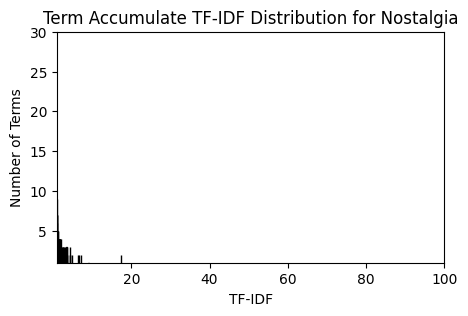

In [71]:
word_counts = nos_df.sum(axis=0).to_numpy()

plt.figure(figsize=(5, 3))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title('Term Accumulate TF-IDF Distribution for Nostalgia')
plt.xlabel('TF-IDF')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.ylim(1, 30)
plt.show()

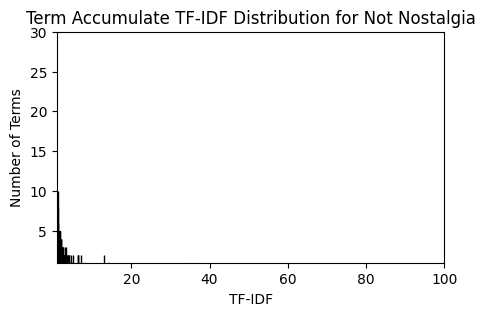

In [72]:
word_counts = nnos_df.sum(axis=0).to_numpy()

plt.figure(figsize=(5, 3))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title('Term Accumulate TF-IDF Distribution for Not Nostalgia')
plt.xlabel('TF-IDF')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.ylim(1, 30)
plt.show()

In [93]:
vectorizer = TfidfVectorizer()
ytc_tfidf = vectorizer.fit_transform(ytc.comment)

In [94]:
# Original
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(ytc_tfidf, ytc['sentiment'], test_size=0.2)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test)

print(classification_report(y_test, y_pred_tfidf))

               precision    recall  f1-score   support

    nostalgia       0.78      0.94      0.85       137
not nostalgia       0.94      0.78      0.85       163

     accuracy                           0.85       300
    macro avg       0.86      0.86      0.85       300
 weighted avg       0.87      0.85      0.85       300



In [95]:
# Bernoulli
from sklearn.naive_bayes import BernoulliNB

X_train, X_test, y_train, y_test = train_test_split(ytc_tfidf, ytc['sentiment'], test_size=0.2)

nb_count = BernoulliNB()
nb_count.fit(X_train, y_train)
y_pred_count = nb_count.predict(X_test)

print(classification_report(y_test, y_pred_count))

               precision    recall  f1-score   support

    nostalgia       0.87      0.94      0.90       141
not nostalgia       0.95      0.87      0.91       159

     accuracy                           0.91       300
    macro avg       0.91      0.91      0.91       300
 weighted avg       0.91      0.91      0.91       300



In [96]:
# Gaussian
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(ytc_tfidf.toarray(), ytc['sentiment'], test_size=0.2)

nb_count = GaussianNB()
nb_count.fit(X_train, y_train)
y_pred_count = nb_count.predict(X_test)

print(classification_report(y_test, y_pred_count))

               precision    recall  f1-score   support

    nostalgia       0.63      0.80      0.70       149
not nostalgia       0.73      0.53      0.61       151

     accuracy                           0.66       300
    macro avg       0.68      0.66      0.66       300
 weighted avg       0.68      0.66      0.66       300

